In [1]:
api_key="HM2SD5G639ZKS5ZW"
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [2]:


class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.ts = TimeSeries(key=api_key, output_format='pandas')

    def fetch_intraday_data(self, script):
        self.data, self.meta_data = self.ts.get_intraday(symbol=script, interval='1min')

    def convert_intraday_data(self, script):
        self.fetch_intraday_data(script)
        self.data.columns = ['open', 'high', 'low', 'close', 'volume']
        self.data.index.names = ['timestamp']
        self.data.index = pd.to_datetime(self.data.index)
        return self.data

    def __getitem__(self, key):
        return self.data.__getitem__(key)

    def __setitem__(self, key, value):
        return self.data.__setitem__(key, value)

    def __contains__(self, item):
        return self.data.__contains__(item)



In [3]:
script_data=ScriptData(api_key)

In [4]:
script_data.fetch_intraday_data("GOOGl")
script_data.convert_intraday_data("GOOGL")

,open,high,low,close,volume
timestamp,,,,,
2023-02-15 20:00:00,97.10,97.11,97.10,97.10,1470.0
2023-02-15 19:59:00,97.12,97.12,97.12,97.12,684.0
2023-02-15 19:58:00,97.12,97.12,97.12,97.12,1298.0
2023-02-15 19:57:00,97.10,97.12,97.10,97.12,1047.0
2023-02-15 19:56:00,97.12,97.12,97.10,97.10,806.0
...,...,...,...,...,...
2023-02-15 18:01:00,96.90,96.95,96.89,96.94,6472.0
2023-02-15 18:00:00,96.90,96.90,96.90,96.90,585.0
2023-02-15 17:59:00,96.90,96.91,96.90,96.91,760.0


In [5]:
def indicator1(df, timeperiod):
    indicator_data = pd.DataFrame({'timestamp': df.index, 
    'indicator': df['close'].rolling(window=timeperiod).mean()})
    return indicator_data

In [6]:
df = pd.DataFrame(script_data.convert_intraday_data("GOOGL"))
indicator1(df, 5)

,timestamp,indicator
timestamp,,
2023-02-15 20:00:00,2023-02-15 20:00:00,NaN
2023-02-15 19:59:00,2023-02-15 19:59:00,NaN
2023-02-15 19:58:00,2023-02-15 19:58:00,NaN
2023-02-15 19:57:00,2023-02-15 19:57:00,NaN
2023-02-15 19:56:00,2023-02-15 19:56:00,97.112
...,...,...
2023-02-15 18:01:00,2023-02-15 18:01:00,96.954
2023-02-15 18:00:00,2023-02-15 18:00:00,96.940
2023-02-15 17:59:00,2023-02-15 17:59:00,96.930


In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
symbol = 'AAPL'
data, _ = ts.get_daily_adjusted(symbol, outputsize='full')

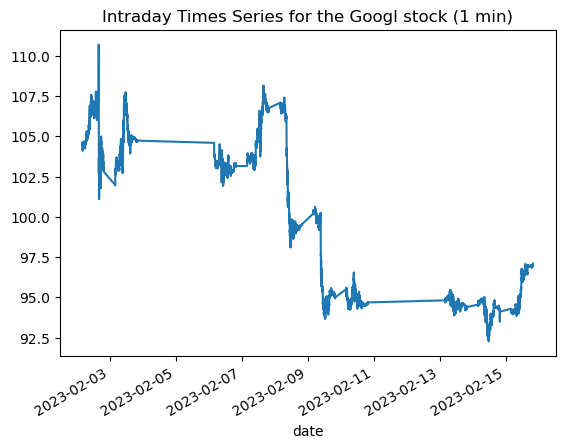

In [24]:
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the Googl stock (1 min)')
plt.show()

In [20]:
df = script_data.convert_intraday_data("NVDA")

In [21]:
close_data = df['close']

In [22]:
timeperiod = 10
indicator_data = indicator1(df[['close']], timeperiod)

In [23]:
indicator_data['indicator']

timestamp
2023-02-15 20:00:00          NaN
2023-02-15 19:59:00          NaN
2023-02-15 19:58:00          NaN
2023-02-15 19:56:00          NaN
2023-02-15 19:54:00          NaN
                         ...    
2023-02-15 17:24:00    227.51188
2023-02-15 17:23:00    227.50088
2023-02-15 17:21:00    227.48088
2023-02-15 17:20:00    227.46319
2023-02-15 17:15:00    227.43719
Name: indicator, Length: 100, dtype: float64

In [24]:
signals = pd.DataFrame({'timestamp': df.index})


In [25]:
signals['signal'] = 'NO_SIGNAL'


In [60]:
print(f"Length of signals: {len(signals)}")
print(f"Length of indicator_data: {len(indicator_data)}")
print(f"Length of close_data: {len(close_data)}")

for i, row in signals.iterrows():
    if i > 0:
        if indicator_data.iloc[i] > close_data.iloc[i] and indicator_data.iloc[i-1] <= close_data.iloc[i-1]['close']:
            signals.at[i, 'signal'] = 'BUY'
        elif indicator_data.iloc[i] < close_data.iloc[i]and indicator_data.iloc[i-1] >= close_data.iloc[i-1]['close']:
            signals.at[i, 'signal'] = 'SELL'

print(f"Length of signals: {len(signals)}")
print(f"Length of indicator_data: {len(indicator_data)}")
print(f"Length of close_data: {len(close_data)}")


for i, row in signals.iterrows():
    if i == 0:
        signals.at[i, 'signal'] = 'NO_SIGNAL'
    elif indicator_data.iloc[i] > close_data.iloc[i] and indicator_data.iloc[i-1] <= close_data.iloc[i-1]:
        signals.at[i, 'signal'] = 'BUY'
    elif indicator_data.iloc[i] < close_data.iloc[i] and indicator_data.iloc[i-1] >= close_data.iloc[i-1]:
        signals.at[i, 'signal'] = 'SELL'
    else:
        signals.at[i, 'signal'] = 'NO_SIGNAL'




Length of signals: 100
Length of indicator_data: 100
Length of close_data: 100
Length of signals: 100
Length of indicator_data: 100
Length of close_data: 100
